# EDA on Stackoverflow Developer Survey

In [2]:
!pip install opendatasets --upgrade --quiet

# Download the dataset

In [3]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_raw = pd.read_csv('./stackoverflow-developer-survey-2020/survey_results_public.csv')
df_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
df_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
schema_df = pd.read_csv('./stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col='Column')
# Using schema_raw to retrieve questions
schema_raw = schema_df.QuestionText

## Data Preparation & Cleaning
### Limiting analysis to the following areas:
- Demorgraphics of the survey respondents & the global programming community
- Distribution of programming skills, experience and preferences
- Employment-related inforamtion, preferences & opinions

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

for i, column in enumerate(selected_columns):
    print(column + ": ", schema_raw[column])

Country:  Where do you live?
Age:  What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Gender:  Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.
EdLevel:  Which of the following best describes the highest level of formal education that you’ve completed?
UndergradMajor:  What was your primary field of study?
Hobbyist:  Do you code as a hobby?
Age1stCode:  At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
YearsCode:  Including any education, how many years have you been coding in total?
YearsCodePro:  NOT including education, how many years have you coded professionally (as a part of your work)?
LanguageWorkedWith:  Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked wi

In [9]:
# Filter only selected columns
df = df_raw[selected_columns]
df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [10]:
df.describe()

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [12]:
df.isnull().sum()

Country                     389
Age                       19015
Gender                    13904
EdLevel                    7030
UndergradMajor            13466
Hobbyist                     45
Age1stCode                 6561
YearsCode                  6777
YearsCodePro              18112
LanguageWorkedWith         7083
LanguageDesireNextYear    10348
NEWLearn                   8305
NEWStuck                   9478
Employment                  607
DevType                   15091
WorkWeekHrs               23310
JobSat                    19267
JobFactors                15112
NEWOvertime               21230
NEWEdImpt                 15996
dtype: int64

In [13]:
survey_df = df.copy()
survey_df.shape

(64461, 20)

### Convert YearCode, Age1stCode, YearCodePro, and WorkWeekHrs columns to number

In [14]:
# Replace non-numeric value with NaN 
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')
survey_df['WorkWeekHrs'] = pd.to_numeric(survey_df['WorkWeekHrs'], errors='coerce')
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


### Drop rows with invalid information

In [15]:
survey_df.drop(survey_df[survey_df['Age'] > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df['Age'] < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df['Age'] < survey_df['Age1stCode']].index, inplace=True)
survey_df.drop(survey_df[survey_df['WorkWeekHrs'] > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df['Age'] < survey_df['YearsCode']].index, inplace=True)




In [16]:
print(survey_df.shape)
survey_df.describe()

(64240, 20)


,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45263.000000,57262.000000,56580.000000,43940.000000,40946.000000
mean,30.836997,15.469142,12.783987,8.873964,39.945813
std,9.501742,5.090990,9.494751,7.763071,10.319663
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,100.000000


In [17]:
import re

def replace_with_nan(gender):
    """ Replace ambigious gender with nan"""
    if gender is np.nan:
        return 'NaN' 
    
    gender_str = re.split(';|, |\*|\n',gender)
    if len(gender_str) > 1 and gender_str[0] == 'Non-binary':
        return ' '.join(gender_str)
    elif len(gender_str) == 1:
        return gender_str[0]
    else:
        return 'NaN'
    

In [18]:
survey_df['Gender'] = survey_df['Gender'].apply(lambda x: replace_with_nan(x))
survey_df['Gender'].value_counts()

Man                                                45847
NaN                                                14180
Woman                                               3832
Non-binary genderqueer or gender non-conforming      381
Name: Gender, dtype: int64

## Exploratory Analysis and Visualization

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Configuration
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
schema_raw.Country

'Where do you live?'

In [21]:
survey_df['Country'].nunique()

183

In [22]:
# Top 15 countries with highest repsonses
top_15 = survey_df['Country'].value_counts().head(15)
lowest_15 = survey_df['Country'].value_counts().tail(15)
top_15

United States         12466
India                  8376
United Kingdom         3893
Germany                3877
Canada                 2187
France                 1893
Brazil                 1811
Netherlands            1338
Poland                 1263
Australia              1207
Spain                  1160
Italy                  1113
Russian Federation     1089
Sweden                  883
Pakistan                807
Name: Country, dtype: int64

/Users/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


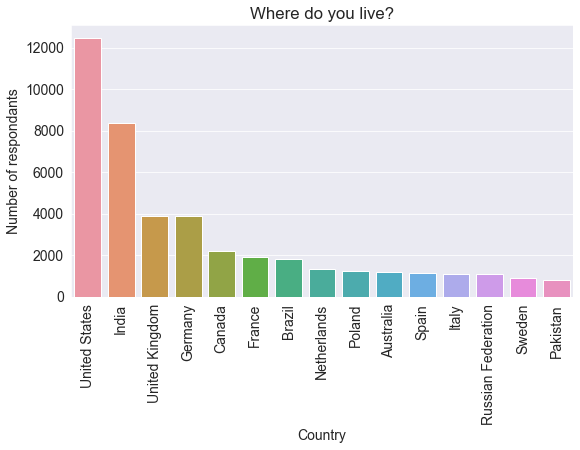

In [23]:
# Plot the distributions
sns.barplot(top_15.index, top_15);
plt.title(schema_raw['Country'])
plt.xlabel('Country')
plt.ylabel('Number of respondants')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Age Distribution')

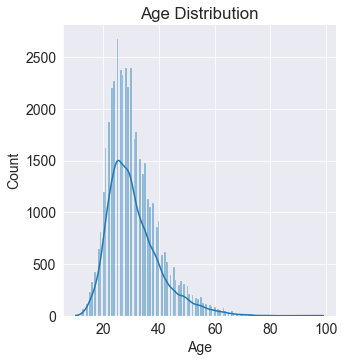

In [24]:
ax = sns.displot(survey_df['Age'], kde=True)
plt.title("Age Distribution")

Text(0.5, 0, 'Age')

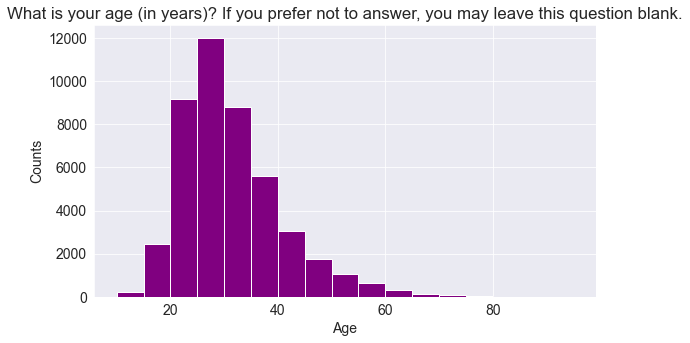

In [25]:
plt.hist(survey_df['Age'], bins=np.arange(10,100,5), color='purple');
plt.title(schema_raw['Age'])
plt.ylabel('Counts')
plt.xlabel('Age')


In [26]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [27]:
gender = survey_df['Gender'].value_counts()
gender

Man                                                45847
NaN                                                14180
Woman                                               3832
Non-binary genderqueer or gender non-conforming      381
Name: Gender, dtype: int64

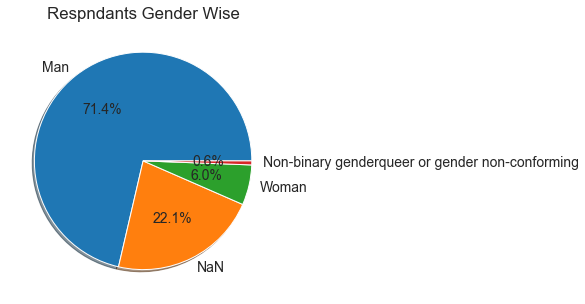

In [28]:
label = gender.index
value = gender.to_list()
plt.title('Respndants Gender Wise')
plt.pie(value, labels=label, shadow=True, autopct='%1.1f%%');

Text(0, 0.5, '')

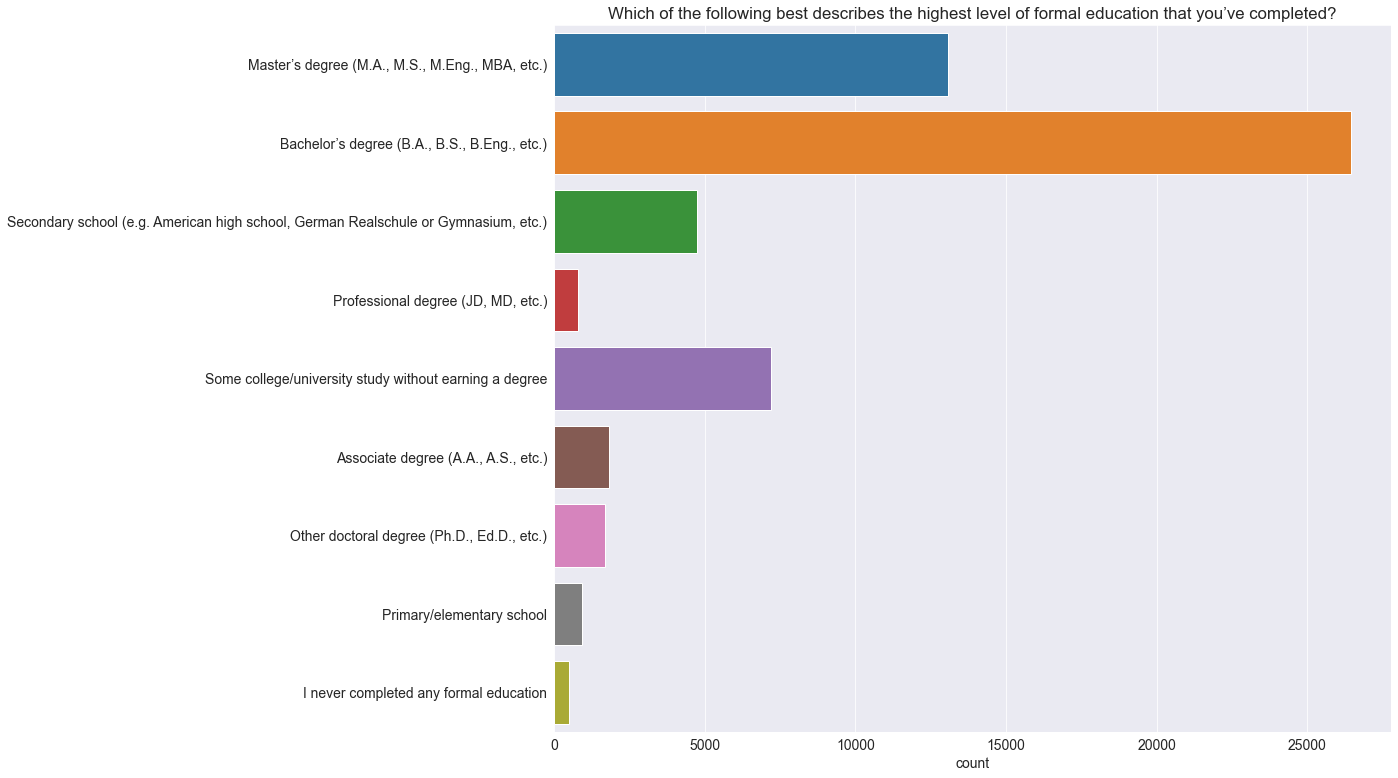

In [29]:
plt.figure(figsize=(15,13))
sns.countplot(y=survey_df['EdLevel'])
plt.title(schema_raw['EdLevel'])
plt.ylabel(None)

In [31]:
schema_raw['UndergradMajor']

'What was your primary field of study?'

Text(0, 0.5, '')

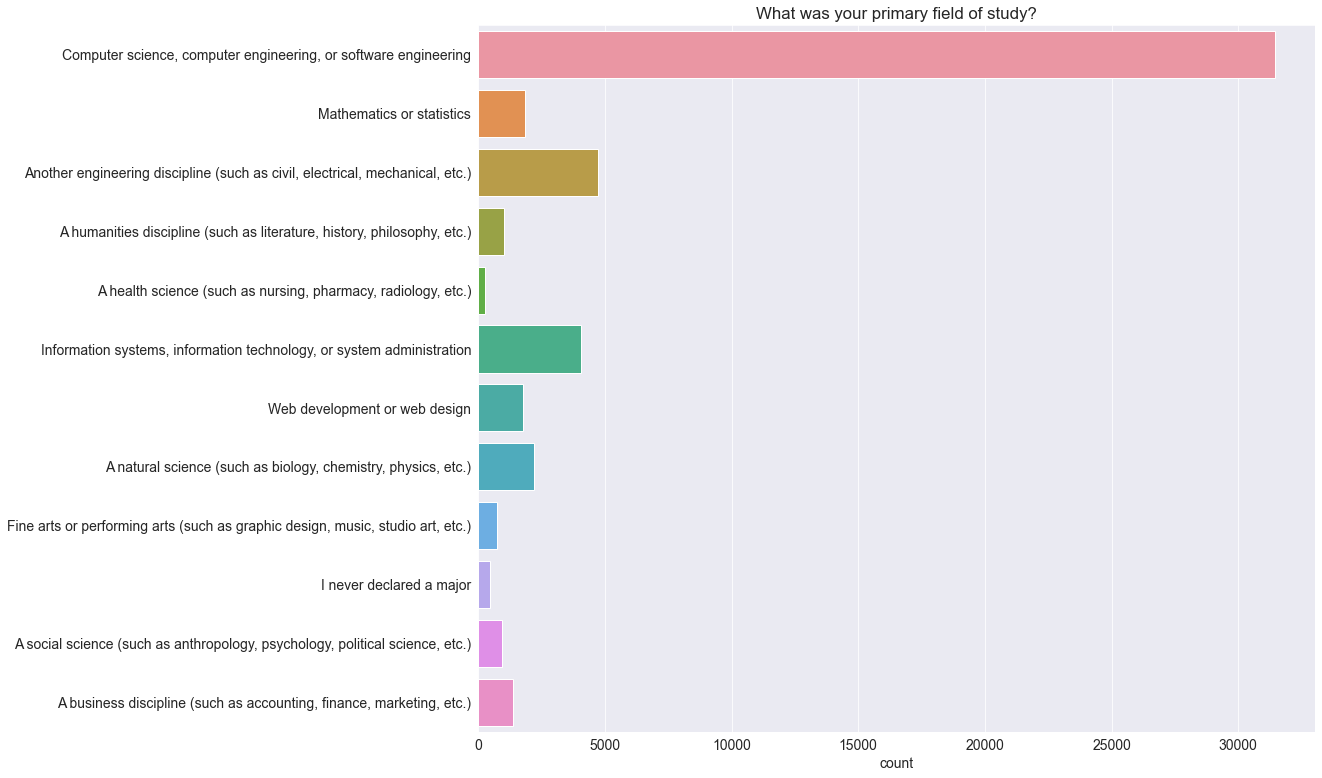

In [30]:
undergrad_majors = survey_df['UndergradMajor'].value_counts()
plt.figure(figsize=(15,13))
sns.countplot(y=survey_df['UndergradMajor'])
plt.title(schema_raw['UndergradMajor'])
plt.ylabel(None)

In [39]:
 percentage_by_major = (survey_df['UndergradMajor'].value_counts() / survey_df['UndergradMajor'].count()) * 100
 percentage_by_major

Computer science, computer engineering, or software engineering                   61.920224
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.325619
Information systems, information technology, or system administration              7.969774
A natural science (such as biology, chemistry, physics, etc.)                      4.325324
Mathematics or statistics                                                          3.628707
Web development or web design                                                      3.510636
A business discipline (such as accounting, finance, marketing, etc.)               2.695948
A humanities discipline (such as literature, history, philosophy, etc.)            1.981620
A social science (such as anthropology, psychology, political science, etc.)       1.834032
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.426688
I never declared a major                                                        

<AxesSubplot:title={'center':'Percentage of Undergrad Major'}, xlabel='Percentage'>

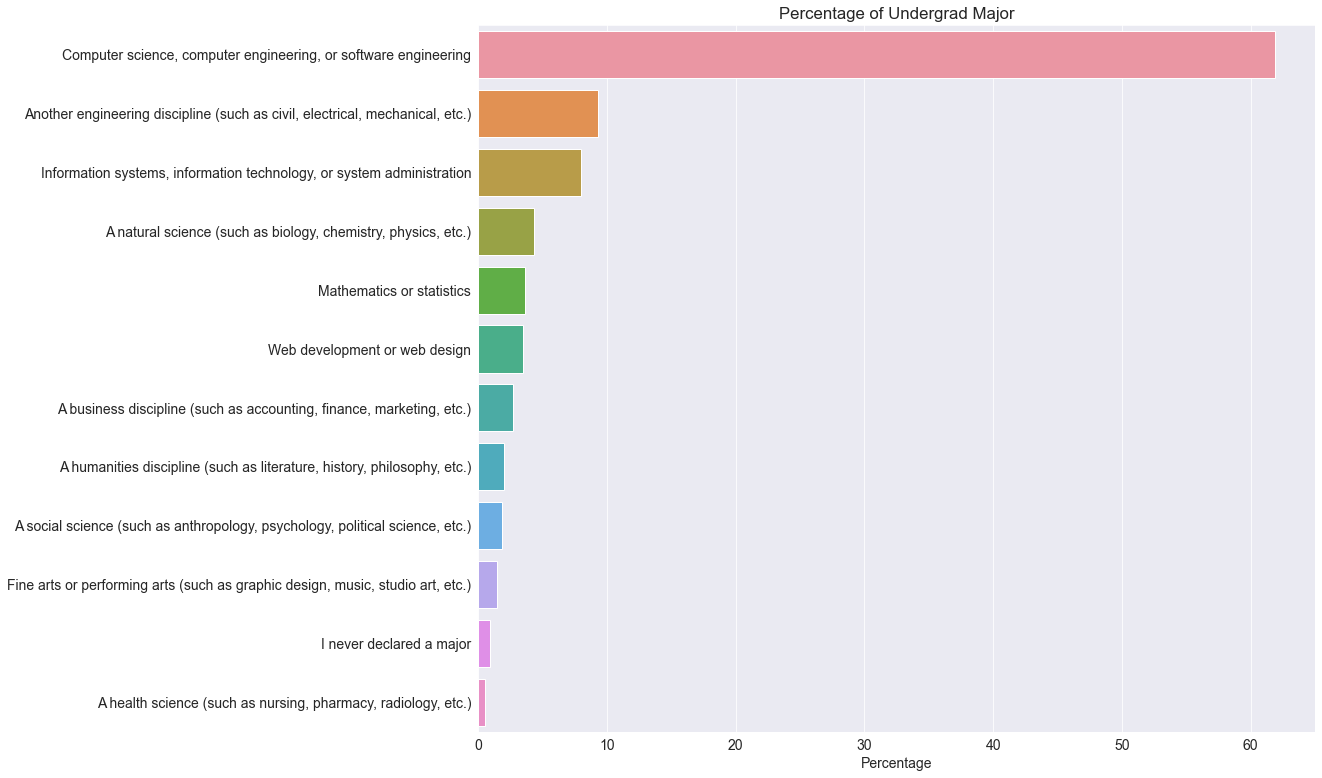

In [46]:
plt.figure(figsize=(15,13))
plt.title('Percentage of Undergrad Major')
plt.xlabel('Percentage')
plt.ylabel(None)
sns.barplot(y=percentage_by_major.index, x=percentage_by_major.to_list())

In [47]:
schema_raw['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

/Users/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Importance of Formal Education'}, xlabel='Level of Importance', ylabel='Numbers of respondants'>

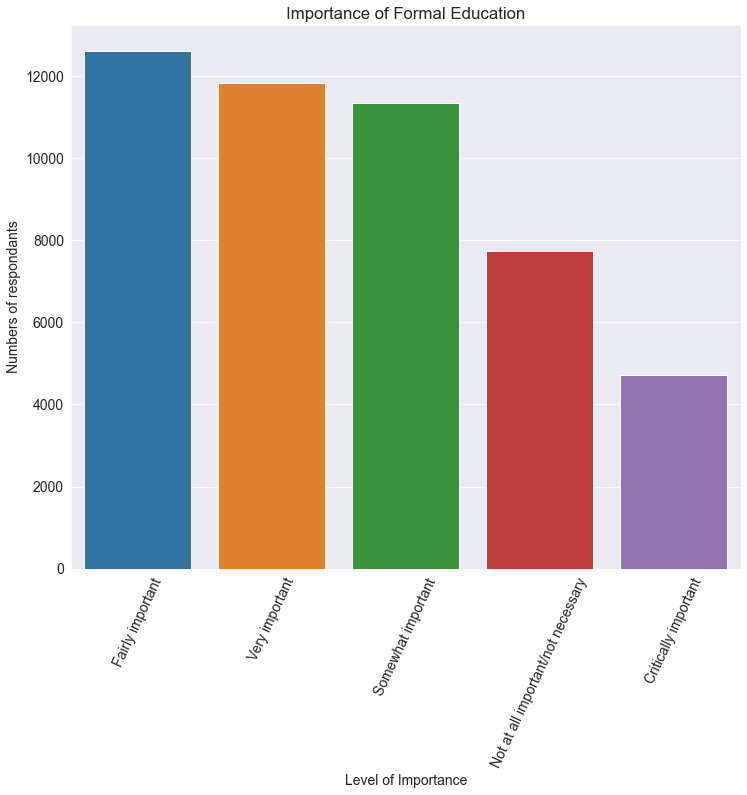

In [54]:
edu_importance = survey_df['NEWEdImpt'].value_counts()

plt.figure(figsize=(12,10))
plt.title('Importance of Formal Education')
plt.xlabel('Level of Importance')
plt.xticks(rotation=65)
plt.ylabel('Numbers of respondants')
sns.barplot(edu_importance.index, edu_importance.to_list())

In [74]:
# CS students who think CS degree is not important at all
not_important = survey_df[(survey_df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering') & (survey_df['NEWEdImpt'] == 'Not at all important/not necessary')].shape[0]


In [78]:
total_cs_students = (survey_df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering').sum()

# Percentage of CS students who think CS degree is not important at all
pct = (not_important / total_cs_students) * 100
pct

8.424966630648955

In [79]:
schema_raw.Employment

'Which of the following best describes your current employment status?'

<AxesSubplot:title={'center':'Percentage of Developers Regarding Employment'}, xlabel='Percentage'>

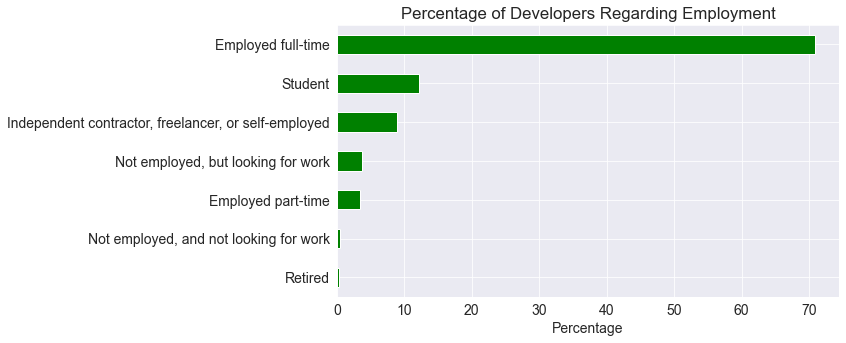

In [92]:
pct_employment = survey_df['Employment'].value_counts(normalize=True, ascending=True) * 100
plt.title('Percentage of Developers Regarding Employment')
plt.xlabel('Percentage')
pct_employment.plot(kind='barh', color='g')

In [93]:
schema_raw['DevType']

'Which of the following describe you? Please select all that apply.'

In [133]:
import re

def count_job_title(series):
    """Take a series and count different kind of position"""
    result = []
    # loop through each row, split, and add to result list
    for row in series:
        if row is not np.nan:
            item_list = re.split(';|,', row)
            for item in item_list:
                result.append(item.strip())
    # Count distint item in result list
    return Counter(result)

/Users/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Percentage of Job titles of Employed Respondants'}, xlabel='Percentage'>

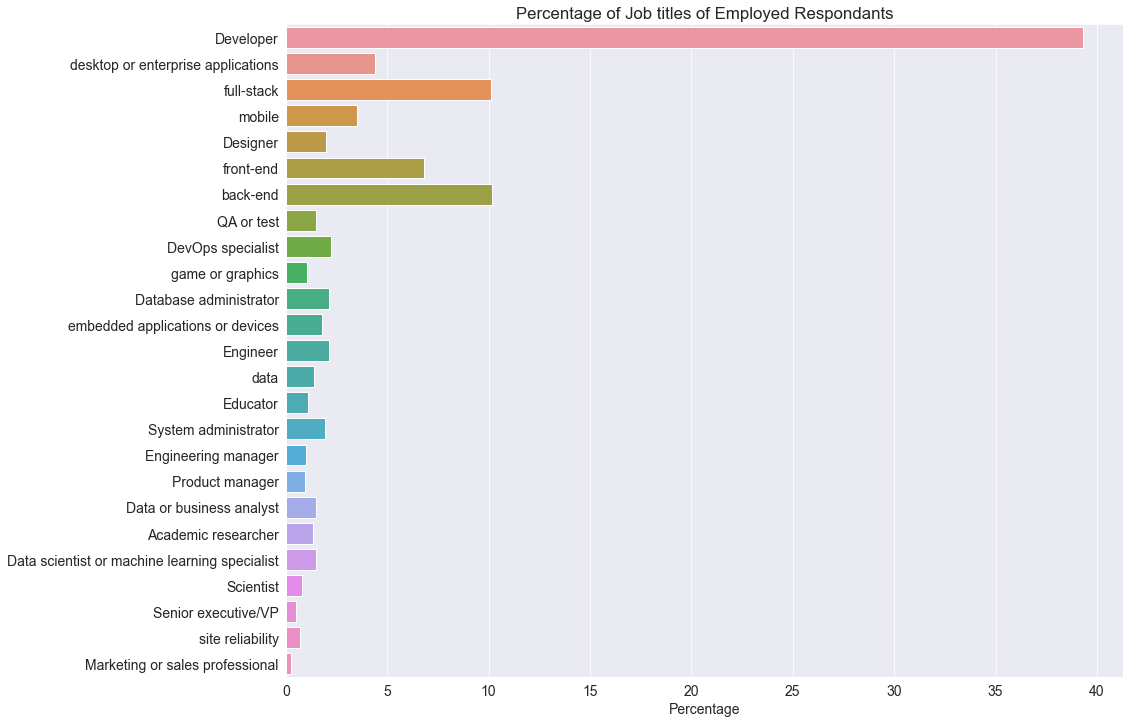

In [163]:
job_title_dict = count_job_title(survey_df['DevType'])

# Get keys and values and plit
keys = list(job_title_dict.keys())
values = list(job_title_dict.values())
job_title_pct = [(value / sum(values)) * 100 for value in values]

# plot bar chart 
plt.figure(figsize=(15,12))
plt.title('Percentage of Job titles of Employed Respondants')
plt.xlabel('Percentage')
y_pos = len(keys)
sns.barplot(job_title_pct, keys)